# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [5]:
df = app_train[['DAYS_BIRTH','TARGET']].copy()
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / 365
df.describe()

,DAYS_BIRTH,TARGET,YEARS_BIRTH
count,307511.000000,307511.000000,307511.000000
mean,16036.995067,0.080729,43.936973
std,4363.988632,0.272419,11.956133
min,7489.000000,0.000000,20.517808
25%,12413.000000,0.000000,34.008219
50%,15750.000000,0.000000,43.150685
75%,19682.000000,0.000000,53.923288
max,25229.000000,1.000000,69.120548


In [6]:
bins = [20,30,40,50,60,70]

In [7]:
df['YEARS_BINNED'] = pd.cut(df['YEARS_BIRTH'], bins = bins) 
df.head()

,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BINNED
0,9461,1,25.920548,"(20, 30]"
1,16765,0,45.931507,"(40, 50]"
2,19046,0,52.180822,"(50, 60]"
3,19005,0,52.068493,"(50, 60]"
4,19932,0,54.608219,"(50, 60]"


In [8]:
counts = df.groupby(['YEARS_BINNED']).mean()
counts

,DAYS_BIRTH,TARGET,YEARS_BIRTH
YEARS_BINNED,,,
"(20, 30]",9717.044868,0.114569,26.622041
"(30, 40]",12819.966844,0.095835,35.123197
"(40, 50]",16335.968997,0.076508,44.756079
"(50, 60]",20066.449752,0.061297,54.976575
"(60, 70]",23124.915709,0.049214,63.355933


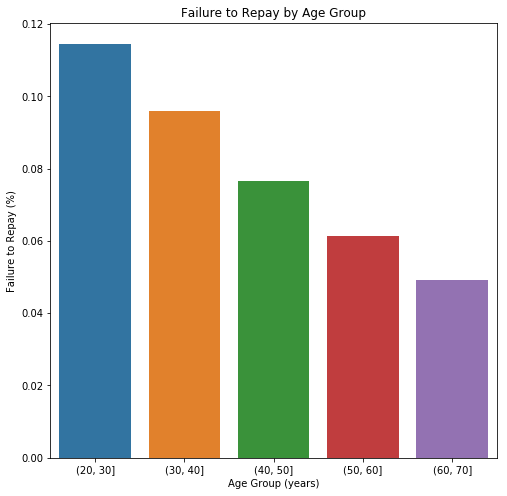

In [9]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = counts.index
py = counts['TARGET']
sns.barplot(px, py)

# Plot labeling

plt.xlabel('Age Group (years)'); 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');